##                                       Analyzing IRIS dataset with k-means and hierachical clustering methods

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
data = pd.read_csv("Iris.csv")
df=data.copy()

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Checking Duplicates
data = df.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [9]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualization

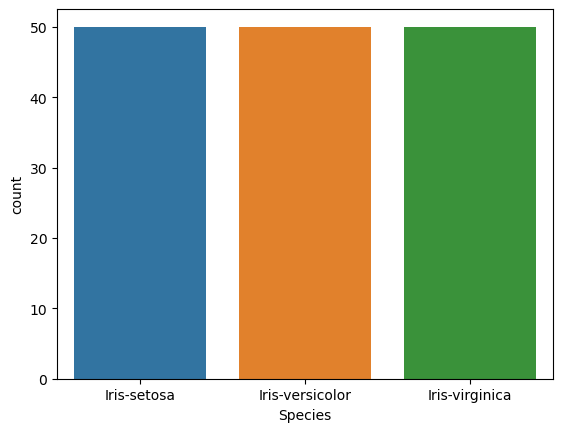

In [10]:
sns.countplot(x='Species', data=df, )
plt.show()

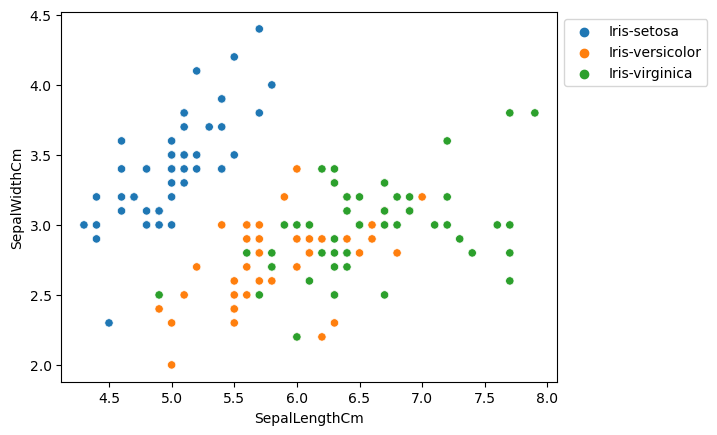

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', 
                    hue='Species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

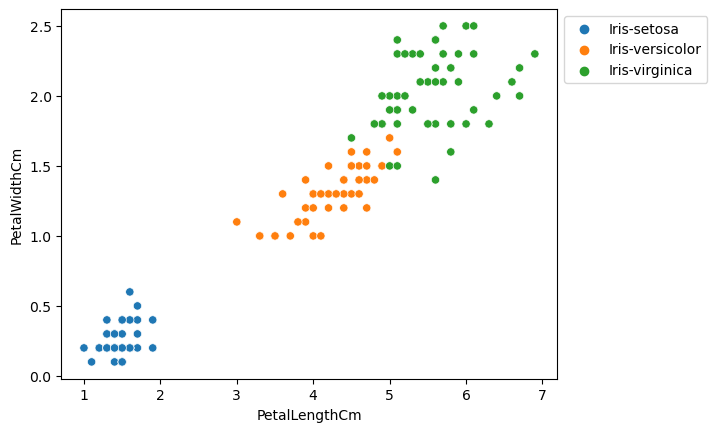

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
               hue='Species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

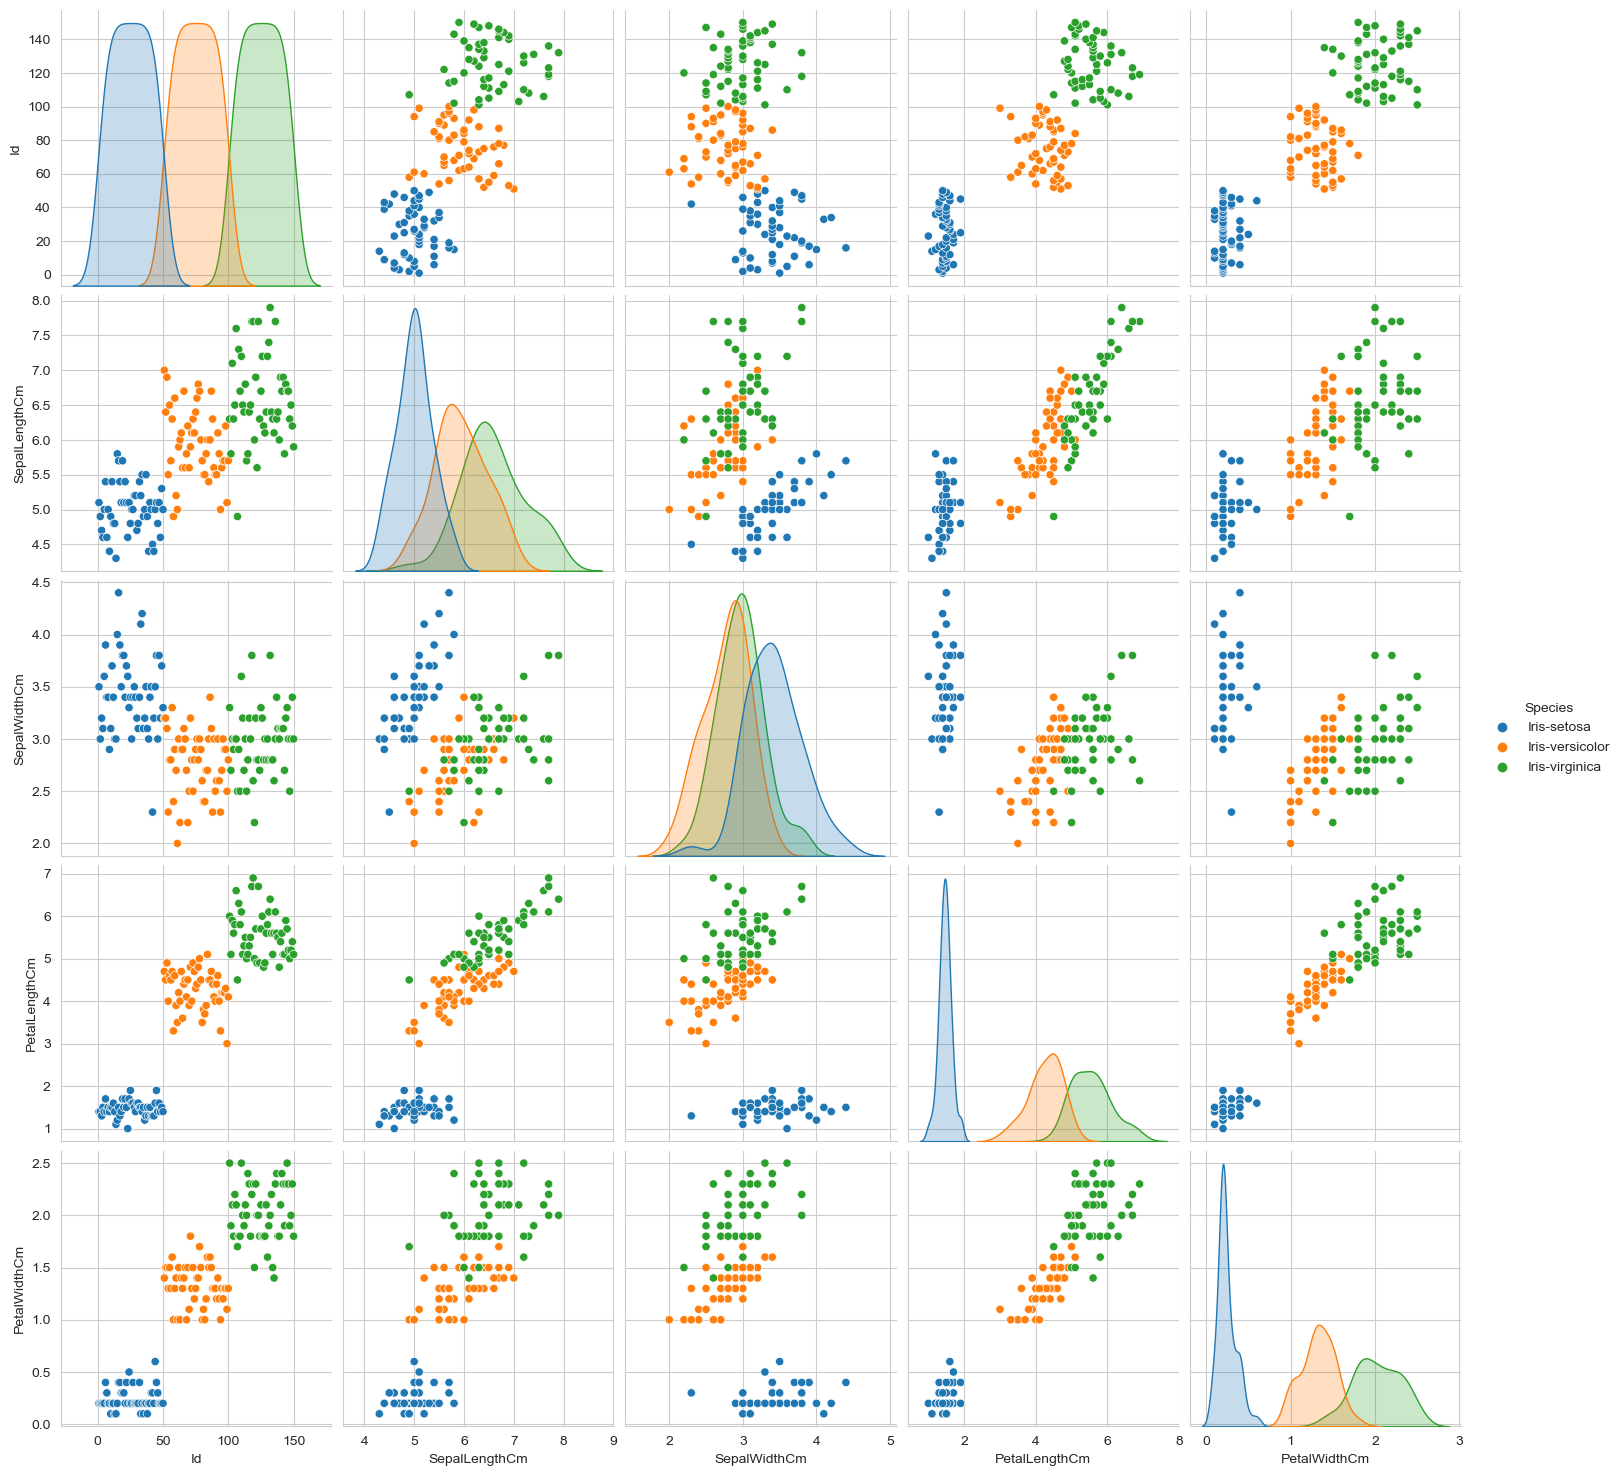

In [13]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",height=3);
plt.show()

## K-Means



K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.



 How to Implementing K-Means Clustering ?


    -Choose the number of clusters k
    -Select k random points from the data as centroids
    -Assign all the points to the closest cluster centroid
    -Recompute the centroids of newly formed clusters
    -Repeat steps 3 and 4


In [14]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [15]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

c:\Users\Hp Probook\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Using the elbow and Silhouete methode to determine the optimal number of clusters for k-means clustering

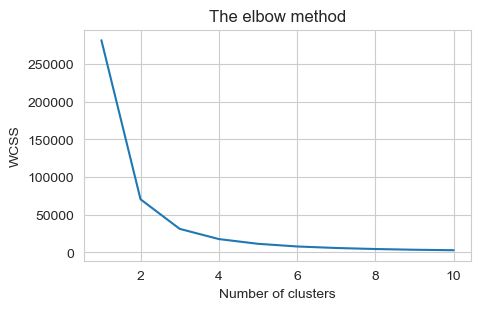

In [16]:
fig = plt.figure(figsize =(5,3))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
     clusterer = KMeans(n_clusters=n_clusters, random_state=42)
     cluster_labels = clusterer.fit_predict(x)
     silhouette_avg = silhouette_score(x, cluster_labels)
     print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6205786765196579
For n_clusters = 3 The average silhouette_score is : 0.5820898597618552
For n_clusters = 4 The average silhouette_score is : 0.5568074891817115
For n_clusters = 5 The average silhouette_score is : 0.5412981836374051


Implementing K-Means Clustering

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [21]:
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

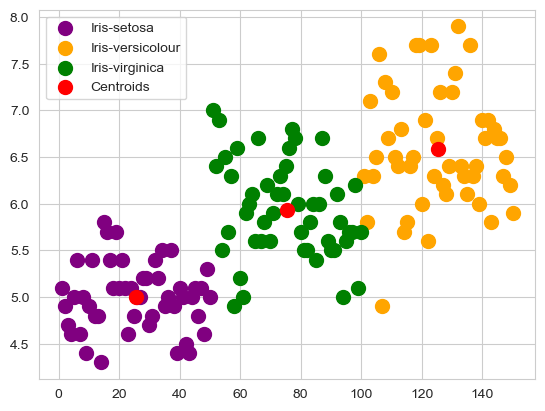

In [19]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()



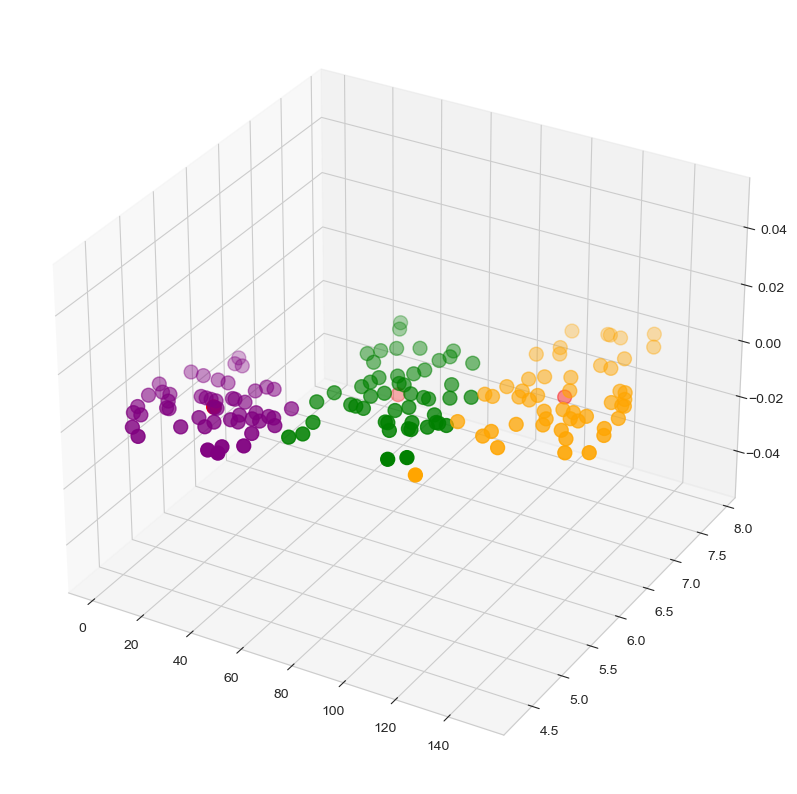

In [26]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

# Hierarchical clustering

<b>Hierarchical clustering </b> (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarch
clustering generally fall into two types:

- <b>Agglomerative </b>: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves
- <b>Divisive </b>: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down t

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

## Agglomerative Clustering

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance $O(n^3)$. In sklearn’s implementation, we can specify the number of clusters to 
assist the algorithm’s performance.


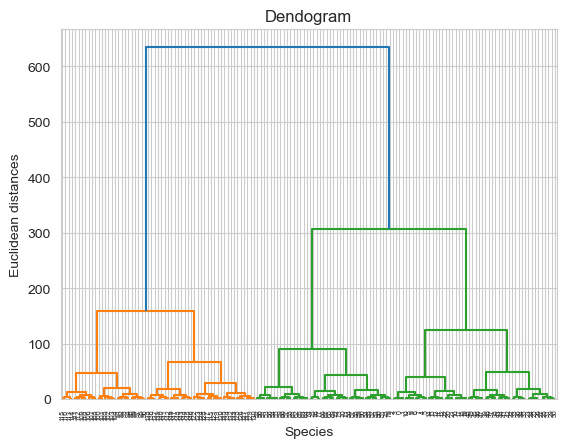

In [35]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [34]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
fig = plt.figure(figsize = (15,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolou)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()

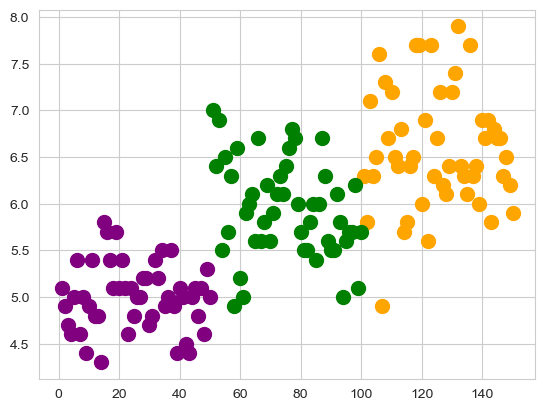

In [37]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
